<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Catalogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones continuas
## Distribución Uniforme Continua $U \sim (0,1)$
### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

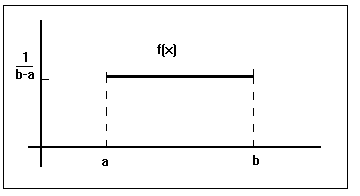

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & \text{si } x < a \\
\frac{x - a}{b - a}, & \text{si } a \leq x \leq b \\
1, & \text{si } x > b
\end{cases}
$$

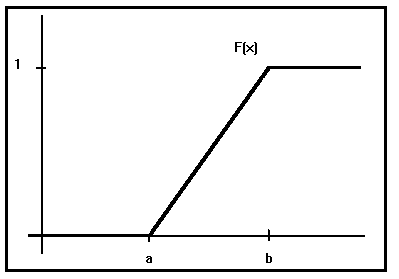

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b}{2}
$$

### Varianza

$$
\text{Var}(X) = \frac{(b - a)^2}{12}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{b - a}{\sqrt{12}}
$$

### Pseudocodigo

Entradas:

a: límite inferior

b: límite superior

Procedimiento:

1. Generar un número aleatorio R entre $0$ y $1$ $(R \sim U(0,1))$
2. Calcular X = a + (b - a) * R
3. Retornar X


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [2]:
a = 2
b = 7

In [3]:
# Teóricos
media_teo = (a + b) / 2
var_teo = (b - a)**2 / 12
std_teo = np.sqrt(var_teo)

In [4]:
def simular_uniforme(n):
  lista = []
  for _ in range(n):
    R = random()
    x = a + (b - a) * R
    lista.append(x)
  return lista

In [5]:
k = 100000

# Llamada a la función
d = simular_uniforme(k)

In [6]:
media_emp = np.mean(d)
var_emp = np.var(d)
std_emp = np.std(d)

In [7]:
# Imprimir resultados
print(f"Intervalo: [{a}, {b}] con {k} simulaciones")
print(f"Media teórica: {media_teo:.4f} | Empírica: {media_emp:.4f}")
print(f"Varianza teórica: {var_teo:.4f} | Empírica: {var_emp:.4f}")
print(f"Desviación estándar teórica: {std_teo:.4f} | Empírica: {std_emp:.4f}")
print("")

Intervalo: [2, 7] con 100000 simulaciones
Media teórica: 4.5000 | Empírica: 4.4932
Varianza teórica: 2.0833 | Empírica: 2.0773
Desviación estándar teórica: 1.4434 | Empírica: 1.4413



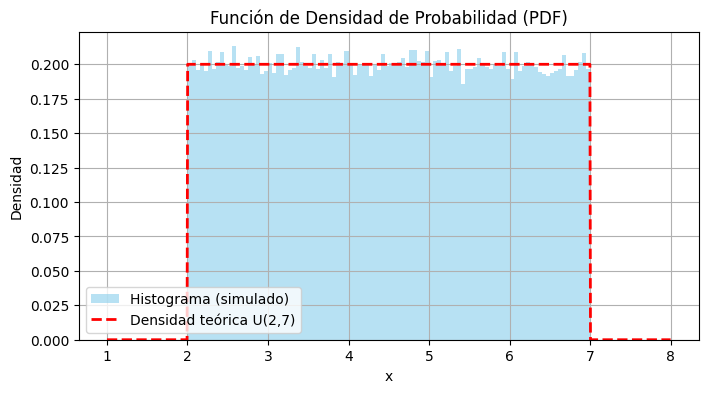

In [9]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x = np.linspace(a - 1, b + 1, 1000)
pdf = np.where((x >= a) & (x <= b), 1 / (b - a), 0)

plt.figure(figsize=(8, 4))
plt.hist(d, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='skyblue')
plt.plot(x, pdf, 'r--', label=f'Densidad teórica U({a},{b})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

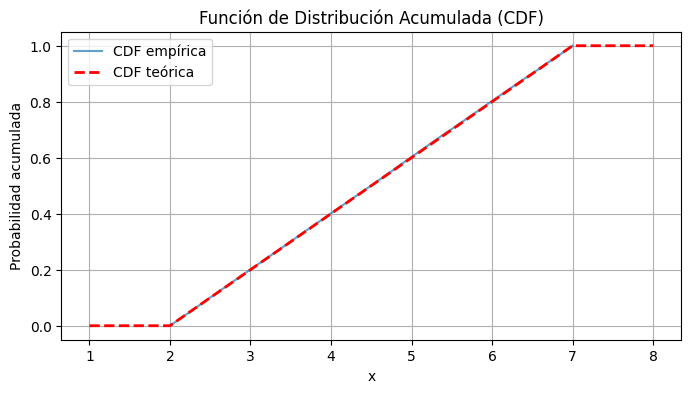

In [10]:
# === GRAFICAR FUNCION ACUMULADA ===
# Ordenar datos simulados para aproximar CDF empírica
d_sorted = np.sort(d)
y_cdf = np.arange(1, k + 1) / k

# CDF teórica
def cdf_uniforme(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

x_vals = np.linspace(a - 1, b + 1, 1000)
cdf_teo = cdf_uniforme(x_vals, a, b)

plt.figure(figsize=(8, 4))
plt.plot(d_sorted, y_cdf, label='CDF empírica', alpha=0.7)
plt.plot(x_vals, cdf_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Triangular

###Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
0, & x < a \\
\frac{2(x - a)}{(b - a)(c - a)}, & a \le x < c \\
\frac{2(b - x)}{(b - a)(b - c)}, & c \le x \le b \\
0, & x > b
\end{cases}
$$



### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{(x - a)^2}{(b - a)(c - a)}, & a \le x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)}, & c \le x \le b \\
1, & x > b
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b + c}{3}
$$

### Varianza

$$
\text{Var}(X) = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

### Pseudocódigo para simular una variable aleatoria Triangular$(a, b, c)$

Entradas:

a: límite inferior

b: límite superior

c: modo $(a < c < b)$

Procedimiento:

1. Generar un número aleatorio $U \sim Uniforme(0, 1)$

2. Calcular $F_c =\frac{c - a}{b - a}$

3. Si $U < F_c$ entonces:

    $X = a + \sqrt{U * (b - a) * (c - a)}$

  En otro caso:

    $X = b - \sqrt{(1 - U) * (b - a) * (b - c)}$

4. Retornar $X$




In [21]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt

In [22]:
# Parámetros de la distribución triangular
tri_a = 2
tri_b = 7
tri_c = 5

In [14]:
# Teóricos
tri_media_teo = (tri_a + tri_b + tri_c) / 3
tri_var_teo = (tri_a**2 + tri_b**2 + tri_c**2 - tri_a*tri_b - tri_a*tri_c - tri_b*tri_c) / 18
tri_std_teo = np.sqrt(tri_var_teo)

In [15]:
# Función para simular la distribución triangular
def simular_triangular(n):
    muestras_tri = []
    F_c = (tri_c - tri_a) / (tri_b - tri_a)
    for _ in range(n):
        R = random()
        if R < F_c:
            x_tri = tri_a + sqrt(R * (tri_b - tri_a) * (tri_c - tri_a))
        else:
            x_tri = tri_b - sqrt((1 - R) * (tri_b - tri_a) * (tri_b - tri_c))
        muestras_tri.append(x_tri)
    return muestras_tri

In [16]:
# Simulación
tri_k = 100000
tri_muestras = simular_triangular(tri_k)

In [17]:
# Estadísticas empíricas
tri_media_emp = np.mean(tri_muestras)
tri_var_emp = np.var(tri_muestras)
tri_std_emp = np.std(tri_muestras)

In [18]:
# Imprimir resultados
print(f"Intervalo: [{tri_a}, {tri_b}] con modo {tri_c} y {tri_k} simulaciones")
print(f"Media teórica: {tri_media_teo:.4f} | Empírica: {tri_media_emp:.4f}")
print(f"Varianza teórica: {tri_var_teo:.4f} | Empírica: {tri_var_emp:.4f}")
print(f"Desviación estándar teórica: {tri_std_teo:.4f} | Empírica: {tri_std_emp:.4f}")
print("")

Intervalo: [2, 7] con modo 5 y 100000 simulaciones
Media teórica: 4.6667 | Empírica: 4.6650
Varianza teórica: 1.0556 | Empírica: 1.0550
Desviación estándar teórica: 1.0274 | Empírica: 1.0271



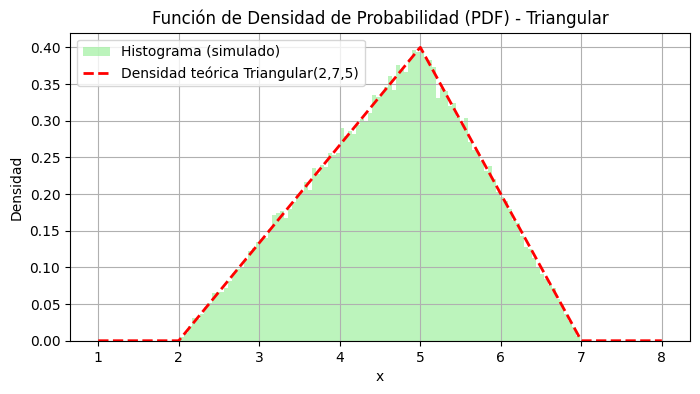

In [19]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_tri_vals = np.linspace(tri_a - 1, tri_b + 1, 1000)
pdf_tri = np.piecewise(x_tri_vals,
    [x_tri_vals < tri_a,
     (x_tri_vals >= tri_a) & (x_tri_vals < tri_c),
     (x_tri_vals >= tri_c) & (x_tri_vals <= tri_b),
     x_tri_vals > tri_b],
    [0,
     lambda x: 2 * (x - tri_a) / ((tri_b - tri_a) * (tri_c - tri_a)),
     lambda x: 2 * (tri_b - x) / ((tri_b - tri_a) * (tri_b - tri_c)),
     0])

plt.figure(figsize=(8, 4))
plt.hist(tri_muestras, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='lightgreen')
plt.plot(x_tri_vals, pdf_tri, 'r--', label=f'Densidad teórica Triangular({tri_a},{tri_b},{tri_c})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

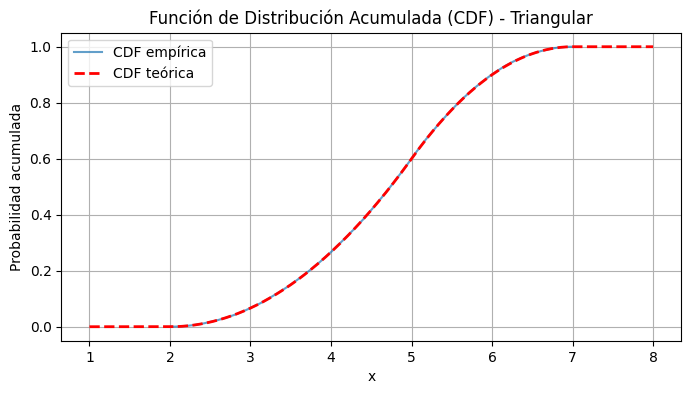

In [20]:
# === GRAFICAR FUNCION ACUMULADA ===
tri_muestras_ordenadas = np.sort(tri_muestras)
tri_cdf_emp = np.arange(1, tri_k + 1) / tri_k

def cdf_triangular(x, a, b, c):
    return np.piecewise(x,
        [x < a,
         (x >= a) & (x < c),
         (x >= c) & (x <= b),
         x > b],
        [0,
         lambda x: ((x - a) ** 2) / ((b - a) * (c - a)),
         lambda x: 1 - ((b - x) ** 2) / ((b - a) * (b - c)),
         1])

x_tri_vals_cdf = np.linspace(tri_a - 1, tri_b + 1, 1000)
cdf_tri_teo = cdf_triangular(x_tri_vals_cdf, tri_a, tri_b, tri_c)

plt.figure(figsize=(8, 4))
plt.plot(tri_muestras_ordenadas, tri_cdf_emp, label='CDF empírica', alpha=0.7)
plt.plot(x_tri_vals_cdf, cdf_tri_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Exponencial

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{1}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{1}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{1}{\lambda}
$$

### Pseudocódigo para simular una variable aleatoria Exponencial $(\lambda)$


Entrada:
    λ: parámetro de tasa (λ > 0)

Procedimiento:
    
    1. Generar un número aleatorio U ~ Uniforme(0, 1)

    2. Calcular $X = - (1 / λ) * ln(1 - U)$
    
    3. Retornar $X$

